In [0]:
from pyspark.sql.functions import isnan, when, count, col, udf
from pyspark.sql.types import DateType, FloatType, StringType
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import pandas as pd
from functools import reduce

In [0]:
df = spark.read.format("csv").option("header", "true").option("sep",";").load("dbfs:/FileStore/shared_uploads/marciobarros.2310@outlook.com/despesas_subfuncao-2.csv")

In [0]:
display(df)

Mês Ano,Área de atuação (Função),Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,_c7
01/2023,04 - Administração,845 - Outras transferências,"0,00","0,00","0,00","0,00",null
01/2023,07 - Relações exteriores,573 - Difusão do conhecimento científico e tecnológico,"1.478.668,37","16.634,91","7.765,08","91.998,58",null
01/2023,04 - Administração,662 - Produção industrial,"212.061,63","66.510,85","66.418,47","3.295.504,32",null
01/2023,18 - Gestão ambiental,573 - Difusão do conhecimento científico e tecnológico,"24.656,00","7.061,01","0,00","432.321,40",null
01/2023,04 - Administração,571 - Desenvolvimento científico,"10.667.058,00","0,00","0,00","0,00",null
01/2023,25 - Energia,130 - Administração de concessões,"6.264.705,77","0,00","0,00","318.206,90",null
01/2023,25 - Energia,665 - Normalização e qualidade,"5.070.130,19","9.408,04","9.408,04","0,00",null
01/2023,18 - Gestão ambiental,571 - Desenvolvimento científico,"7.000,00","253,00","253,00","850,00",null
01/2023,25 - Energia,751 - Conservação de energia,"2.451.573,23","1.367.102,83","803.375,67","550.927,29",null
01/2023,04 - Administração,183 - Informação e inteligência,"4.424.884,30","1.504.052,50","1.238.374,56","3.464.885,05",null


In [0]:
df.printSchema()

root
 |-- Mês Ano: string (nullable = true)
 |-- Área de atuação (Função): string (nullable = true)
 |-- Subfunção: string (nullable = true)
 |-- Valor Empenhado: string (nullable = true)
 |-- Valor Liquidado: string (nullable = true)
 |-- Valor Pago: string (nullable = true)
 |-- Valor Restos a Pagar Pagos: string (nullable = true)
 |-- _c7: string (nullable = true)



Vendo quem tem valores nulos, faltantes,...


In [0]:
df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns]).show()

+-------+------------------------+---------+---------------+---------------+----------+--------------------------+----+
|Mês Ano|Área de atuação (Função)|Subfunção|Valor Empenhado|Valor Liquidado|Valor Pago|Valor Restos a Pagar Pagos| _c7|
+-------+------------------------+---------+---------------+---------------+----------+--------------------------+----+
|      0|                       0|        0|              0|              0|         0|                         0|3104|
+-------+------------------------+---------+---------------+---------------+----------+--------------------------+----+



Removendo coluna que so tem elementos nulos

In [0]:
df = df.drop('_c7')
df.show()

+-------+------------------------+--------------------+---------------+---------------+------------+--------------------------+
|Mês Ano|Área de atuação (Função)|           Subfunção|Valor Empenhado|Valor Liquidado|  Valor Pago|Valor Restos a Pagar Pagos|
+-------+------------------------+--------------------+---------------+---------------+------------+--------------------------+
|01/2023|      04 - Administração|845 - Outras tran...|           0,00|           0,00|        0,00|                      0,00|
|01/2023|    07 - Relações ext...|573 - Difusão do ...|   1.478.668,37|      16.634,91|    7.765,08|                 91.998,58|
|01/2023|      04 - Administração|662 - Produção in...|     212.061,63|      66.510,85|   66.418,47|              3.295.504,32|
|01/2023|    18 - Gestão ambie...|573 - Difusão do ...|      24.656,00|       7.061,01|        0,00|                432.321,40|
|01/2023|      04 - Administração|571 - Desenvolvim...|  10.667.058,00|           0,00|        0,00|    

Selecionando colunas numericas

In [0]:
colunas_float = df.columns[-4:]
colunas_float

Out[166]: ['Valor Empenhado',
 'Valor Liquidado',
 'Valor Pago',
 'Valor Restos a Pagar Pagos']

Transformando os elementos da colunas numericas no formato que seja possível a conversão para float

In [0]:
def floatString(str):
    str = re.sub('[.]', '', str).replace(',','.')
    return ''.join(str.split(' '))

In [0]:
for coluna in colunas_float:
    df = df.withColumn(coluna, 
                       udf(lambda x: floatString(x),StringType())(col(coluna)))
df.show(3)

+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|Mês Ano|Área de atuação (Função)|           Subfunção|Valor Empenhado|Valor Liquidado|Valor Pago|Valor Restos a Pagar Pagos|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|01/2023|      04 - Administração|845 - Outras tran...|           0.00|           0.00|      0.00|                      0.00|
|01/2023|    07 - Relações ext...|573 - Difusão do ...|     1478668.37|       16634.91|   7765.08|                  91998.58|
|01/2023|      04 - Administração|662 - Produção in...|      212061.63|       66510.85|  66418.47|                3295504.32|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
only showing top 3 rows



Conversão para float

In [0]:
for column in colunas_float:
    df = df.withColumn(column,df[column].cast(FloatType()))
df.printSchema()

root
 |-- Mês Ano: string (nullable = true)
 |-- Área de atuação (Função): string (nullable = true)
 |-- Subfunção: string (nullable = true)
 |-- Valor Empenhado: float (nullable = true)
 |-- Valor Liquidado: float (nullable = true)
 |-- Valor Pago: float (nullable = true)
 |-- Valor Restos a Pagar Pagos: float (nullable = true)



Tratando valores negativos

In [0]:
df.where(col('Valor Pago')<0).show()

+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|Mês Ano|Área de atuação (Função)|           Subfunção|Valor Empenhado|Valor Liquidado|Valor Pago|Valor Restos a Pagar Pagos|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|01/2023|    09 - Previdência ...|845 - Outras tran...|     1.270812E8|   1.26493784E8| -19551.07|                 279350.38|
|03/2023|    23 - Comércio e s...|846 - Outros enca...|     -2000000.0|      -818115.7| -818115.7|                       0.0|
|03/2023|    23 - Comércio e s...|331 - Proteção e ...|     -1230751.2|      -545465.2| -545465.2|                       0.0|
|03/2023|    23 - Comércio e s...|122 - Administraç...|   -1.6825452E7|     -6049037.5|-6058909.0|                 2286541.2|
|04/2023|    05 - Defesa nacional|366 - Educação de...|        -6000.0|        -503.08|   -503.08|                   1

Como não achei nada sobre significado desses valores como negativos, irei considerá-los como erro, ja que não consigo ver sentido para eles assumirem valores negativos

In [0]:
for column in colunas_float:
    df = df.withColumn(column,
                       udf(lambda x: abs(x),FloatType())(col(column)))

In [0]:
df.show(3)

+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|Mês Ano|Área de atuação (Função)|           Subfunção|Valor Empenhado|Valor Liquidado|Valor Pago|Valor Restos a Pagar Pagos|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|01/2023|      04 - Administração|845 - Outras tran...|            0.0|            0.0|       0.0|                       0.0|
|01/2023|    07 - Relações ext...|573 - Difusão do ...|      1478668.4|       16634.91|   7765.08|                  91998.58|
|01/2023|      04 - Administração|662 - Produção in...|      212061.62|       66510.85|  66418.47|                 3295504.2|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
only showing top 3 rows



Retirando números antes dos nomes

In [0]:
df = df.withColumn('Área de atuação (Função)',
                   udf(lambda x: x[5:],
                   StringType())(col('Área de atuação (Função)')))

In [0]:
df = df.withColumn('Subfunção',
                   udf(lambda x: x[6:],StringType())(col('Subfunção')))

In [0]:
df.show(3)

+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|Mês Ano|Área de atuação (Função)|           Subfunção|Valor Empenhado|Valor Liquidado|Valor Pago|Valor Restos a Pagar Pagos|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
|01/2023|           Administração|Outras transferên...|            0.0|            0.0|       0.0|                       0.0|
|01/2023|     Relações exteriores|Difusão do conhec...|      1478668.4|       16634.91|   7765.08|                  91998.58|
|01/2023|           Administração| Produção industrial|      212061.62|       66510.85|  66418.47|                 3295504.2|
+-------+------------------------+--------------------+---------------+---------------+----------+--------------------------+
only showing top 3 rows



In [0]:
df.select('Área de atuação (Função)').distinct().count()

Out[176]: 28

In [0]:
def filtro(df,coluna_procurar,coluna_agrupada,procurada):
    return df.filter(df[coluna_procurar]==procurada)[[coluna_agrupada,'Valor Pago']].\
           groupBy(coluna_agrupada).sum().\
           withColumnRenamed("sum(Valor Pago)","Pago").\
           orderBy('Pago').\
           where(col("Pago")>0).\
           toPandas()

In [0]:
df_AreaPago = df[['Área de atuação (Função)','Valor Pago']].\
    groupBy('Área de atuação (Função)').sum().\
    withColumnRenamed("sum(Valor Pago)","Pago").\
    orderBy('Pago').\
    where(col("Pago")>0).\
    toPandas()

Out[179]: <AxesSubplot:title={'center':'Despesas'}, ylabel='Área de atuação (Função)'>

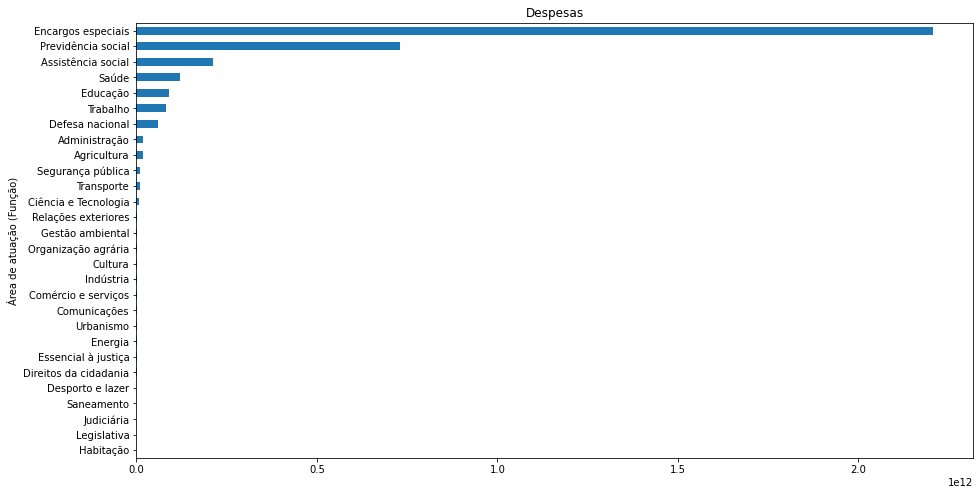

In [0]:
df_AreaPago.\
    plot.barh(x='Área de atuação (Função)', \
        title='Despesas', \
        figsize=(15, 8), \
        legend=False)

In [0]:
df_EduPago = filtro(df,'Área de atuação (Função)','Subfunção','Educação')

Out[181]: <AxesSubplot:title={'center':'Gastos com Educação'}, ylabel='Subfunção'>

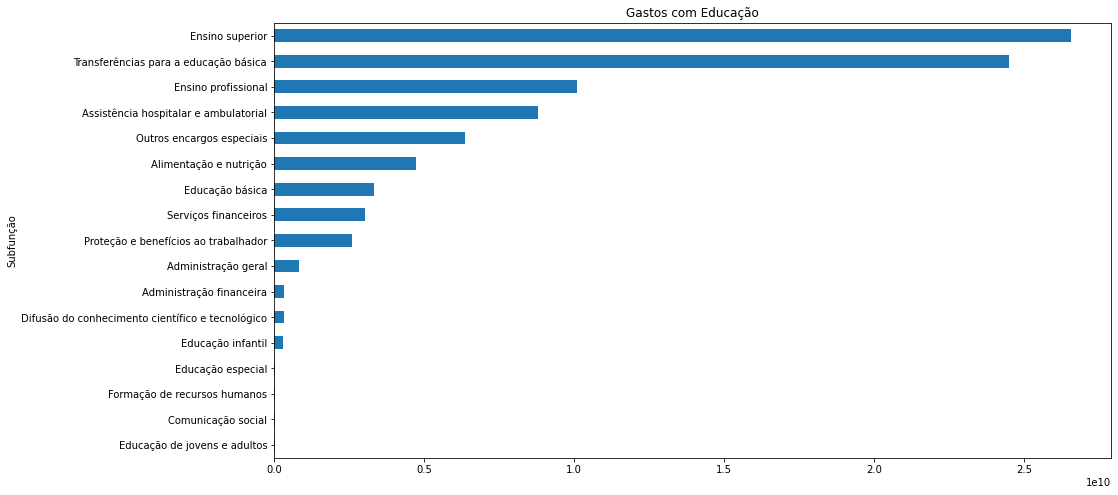

In [0]:
df_EduPago.plot.barh(x='Subfunção', figsize=(15, 8),title='Gastos com Educação',legend=False)

In [0]:
df_CultPago = filtro(df,'Área de atuação (Função)','Subfunção','Cultura')

Out[183]: <AxesSubplot:title={'center':'Gastos em Cultura'}, ylabel='Subfunção'>

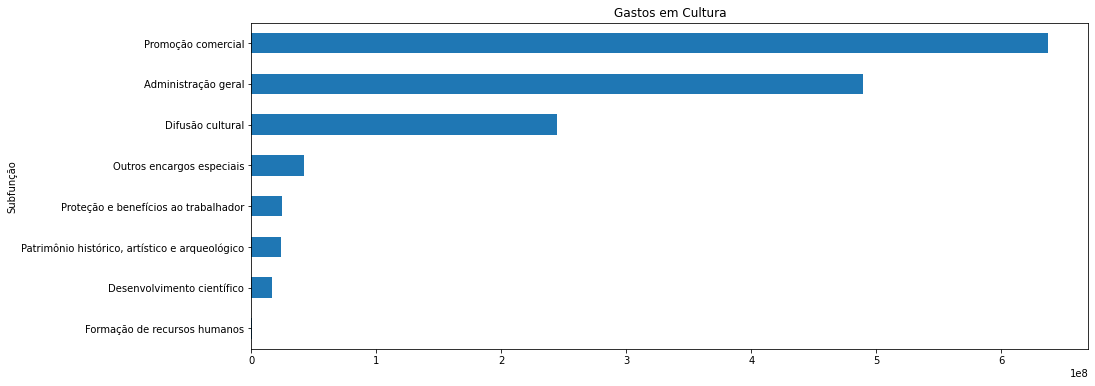

In [0]:
df_CultPago.plot.barh(x='Subfunção', figsize=(15, 6),title='Gastos em Cultura',legend=False)

In [0]:
df_DensCPago = filtro(df,'Subfunção','Área de atuação (Função)','Desenvolvimento científico')

Out[185]: <AxesSubplot:title={'center':'Gastos em Desenvolvimento Científico'}, ylabel='Área de atuação (Função)'>

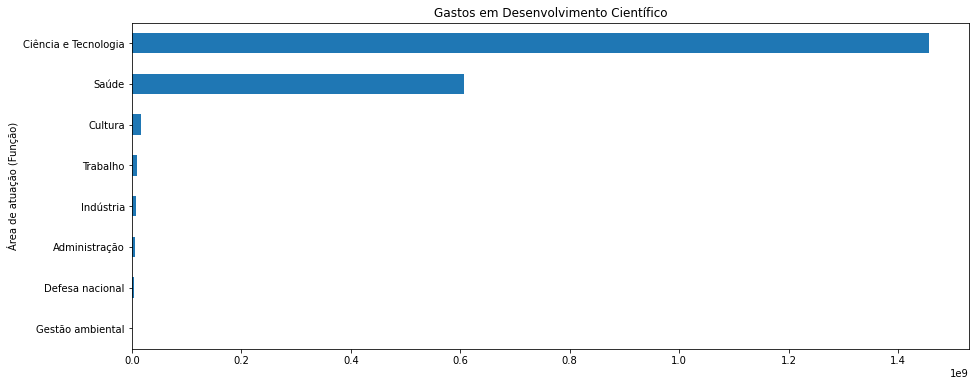

In [0]:
df_DensCPago.plot.barh(x='Área de atuação (Função)',title='Gastos em Desenvolvimento Científico',figsize=(15, 6),legend=False)

In [0]:
dif_df = df.toPandas()[['Valor Pago','Valor Liquidado','Área de atuação (Função)','Subfunção']]
dif_df['dif'] = (dif_df['Valor Pago']-dif_df['Valor Liquidado'])
dif_df['perc'] = ((dif_df['Valor Pago']/dif_df['Valor Liquidado']-1)*100)
dif_df['status'] = pd.cut(x=dif_df['dif'],bins=[-float("inf"),0,float("inf")],
                        labels=["Prejuízo","Excedente"],
                        include_lowest=True)

Procurar valores empenhados mas não liquidados, ou seja, valores separados para serviços não entregues

Procurar liquidados mas não pagos, ou seja, quem passa mais calote

Ver quem paga mais do que o necessário(liquidado)

In [0]:
#Qtd servicos tudo ok
#a = df.groupBy('Área de atuação (Função)').count().withColumnRenamed("count","Qtd servicos total").toPandas()
df1 = df.where(col('Valor Empenhado') == col('Valor Liquidado')).\
    groupBy("Área de atuação (Função)").\
    count().withColumnRenamed("count","Qtd de Serviços Pagos Corretos").toPandas()

#Qtd de Serviços Incompletos
df2 = df.where((col('Valor Empenhado') >0) & (col('Valor Liquidado') == 0)).\
    groupBy("Área de atuação (Função)").\
    count().withColumnRenamed("count","Qtd de Serviços Incompletos").toPandas()

#Qtd de Serviços Completos não Pagos
df3 = df.where((col('Valor Liquidado') > 0) & (col('Valor Pago') == 0)).\
    groupBy("Área de atuação (Função)").\
    count().withColumnRenamed("count","Qtd de Serviços Completos não Pagos").toPandas()

#Qtd de vezes que pagaram excedentes
df4 = dif_df.loc[dif_df['dif']>0][['Área de atuação (Função)','dif']].\
    groupby('Área de atuação (Função)').count().reset_index().rename(columns= {'dif':'Qtd de vezes que pagaram excedentes'})

#Qtd de vezes que não pagaram por completo
df5 = dif_df.loc[dif_df['dif']<0][['Área de atuação (Função)','dif']].\
    groupby('Área de atuação (Função)').count().reset_index().rename(columns= {'dif':'Qtd de vezes que não pagaram por completo'})


In [0]:

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Área de atuação (Função)'],
                                            how='left'), data_frames).fillna(0)
df_merged

,Área de atuação (Função),Qtd de Serviços Pagos Corretos,Qtd de Serviços Incompletos,Qtd de Serviços Completos não Pagos,Qtd de vezes que pagaram excedentes,Qtd de vezes que não pagaram por completo
0,Relações exteriores,12,0.0,1.0,30.0,40.0
1,Habitação,18,1.0,0.0,0.0,0.0
2,Segurança pública,14,4.0,0.0,21.0,34.0
3,Organização agrária,8,1.0,0.0,34.0,35.0
4,Trabalho,13,4.0,0.0,25.0,33.0
5,Urbanismo,44,12.0,0.0,23.0,25.0
6,Ciência e Tecnologia,36,5.0,0.0,29.0,56.0
7,Defesa nacional,11,13.0,5.0,83.0,170.0
8,Administração,25,10.0,1.0,72.0,101.0
9,Legislativa,6,0.0,1.0,5.0,6.0


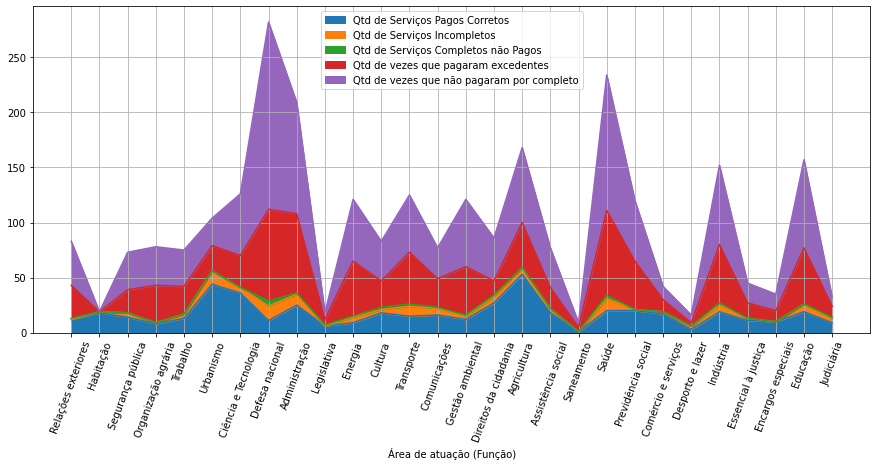

In [0]:
ax = df_merged.plot(kind='area',x='Área de atuação (Função)',figsize=(15, 6))
plt.xticks(range(0,len(list(df_merged['Área de atuação (Função)'].values))), list(df_merged['Área de atuação (Função)'].values),rotation=70)
plt.grid(axis='both')

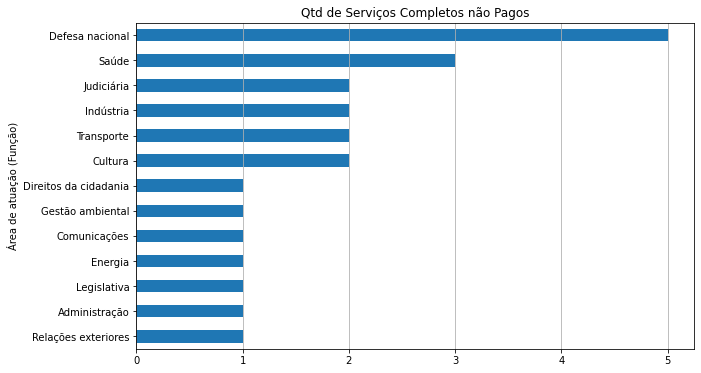

In [0]:
df.where((col('Valor Liquidado') > 0) & (col('Valor Pago') == 0)).\
    groupBy("Área de atuação (Função)").\
    count().orderBy('count').toPandas().plot(kind='barh',
                                             figsize=(10, 6),
                                             x='Área de atuação (Função)',
                                             y='count',
                                             title='Qtd de Serviços Completos não Pagos',
                                             legend=False)
plt.grid(axis='x')

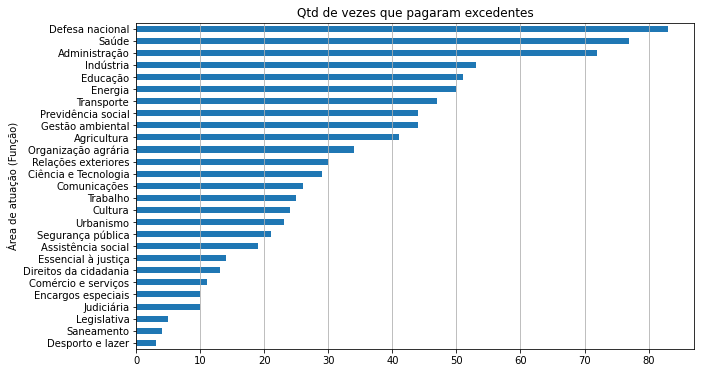

In [0]:
dif_df.loc[dif_df['dif']>0][['Área de atuação (Função)','dif']].\
    groupby('Área de atuação (Função)').count().\
    sort_values('dif').plot.barh(figsize=(10, 6),legend=False,title='Qtd de vezes que pagaram excedentes')
plt.grid(axis='x')

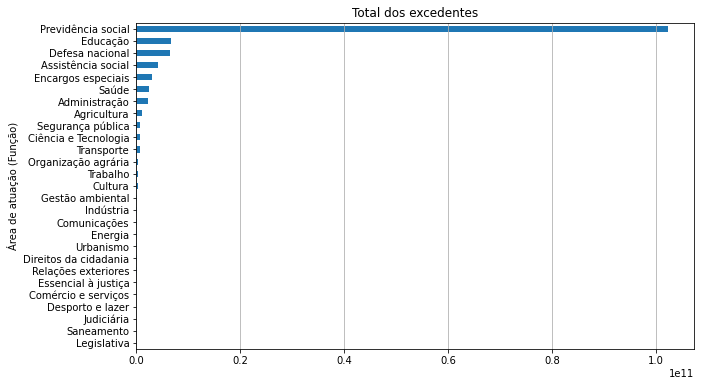

In [0]:
dif_df.loc[dif_df['dif']>0][['Área de atuação (Função)','dif']].\
    groupby('Área de atuação (Função)').sum().\
    sort_values('dif').plot.barh(figsize=(10, 6),legend=False,title='Total dos excedentes')
plt.grid(axis='x')

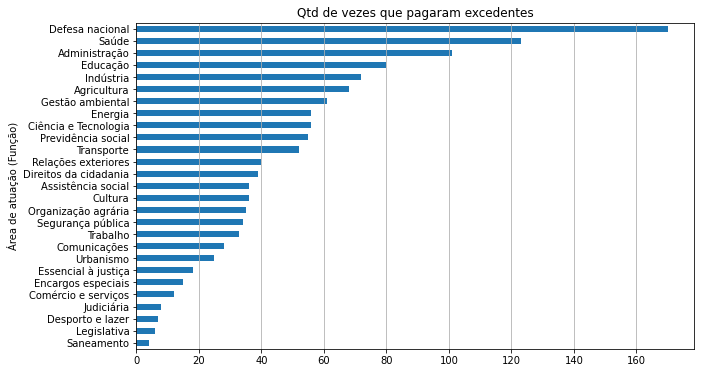

In [0]:
dif_df.loc[dif_df['dif']<0][['Área de atuação (Função)','dif']].\
    groupby('Área de atuação (Função)').count().\
    sort_values('dif').plot.barh(figsize=(10, 6),legend=False,title='Qtd de vezes que pagaram excedentes')
plt.grid(axis='x')

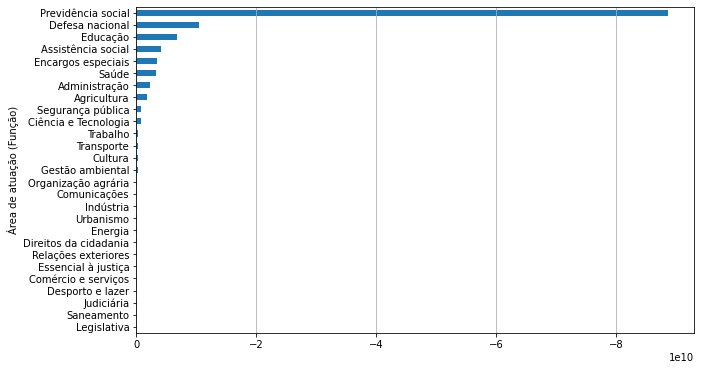

In [0]:
ax = dif_df.loc[dif_df['dif']<0][['Área de atuação (Função)','dif']].\
    groupby('Área de atuação (Função)').sum().\
    sort_values('dif',ascending=False).plot.barh(figsize=(10, 6),legend=False)
plt.grid(axis='x')
ax.invert_xaxis()

Out[195]: (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(1, 0, 'Administração'),
  Text(2, 0, 'Agricultura'),
  Text(3, 0, 'Assistência social'),
  Text(4, 0, 'Ciência e Tecnologia'),
  Text(5, 0, 'Comunicações'),
  Text(6, 0, 'Comércio e serviços'),
  Text(7, 0, 'Cultura'),
  Text(8, 0, 'Defesa nacional'),
  Text(9, 0, 'Desporto e lazer'),
  Text(10, 0, 'Direitos da cidadania'),
  Text(11, 0, 'Educação'),
  Text(12, 0, 'Encargos especiais'),
  Text(13, 0, 'Energia'),
  Text(14, 0, 'Essencial à justiça'),
  Text(15, 0, 'Gestão ambiental'),
  Text(16, 0, 'Habitação'),
  Text(17, 0, 'Indústria'),
  Text(18, 0, 'Judiciária'),
  Text(19, 0, 'Legislativa'),
  Text(20, 0, 'Organização agrária'),
  Text(21, 0, 'Previdência social'),
  Text(22, 0, 'Relações exteriores'),
  Text(23, 0, 'Saneamento'),
  Text(24, 0, 'Saúde'),
  Text(25, 0, 'Segurança pública'),
  Text(26, 0, 'Trabalho'),
  Text(27, 0, 'Trans

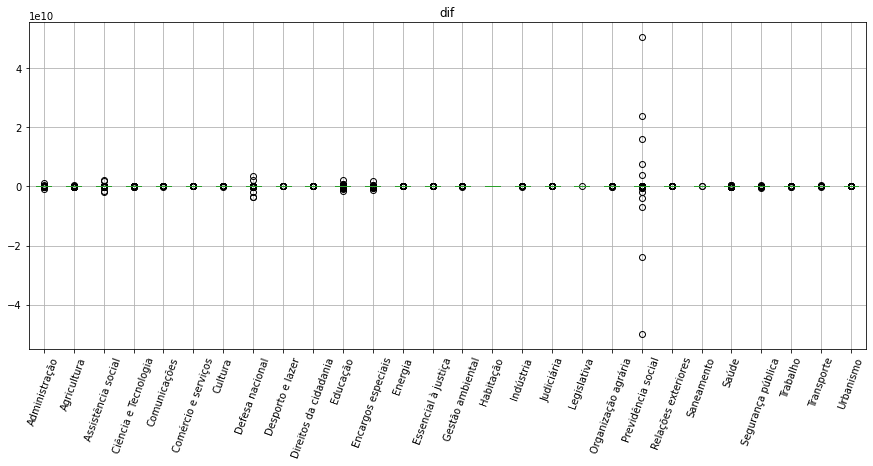

In [0]:
dif_df[['dif','Área de atuação (Função)']].plot.box(column='dif', by='Área de atuação (Função)',figsize=(15, 6))
plt.grid(axis='both')
plt.xticks(rotation=70)

In [0]:
df_ps = dif_df.loc[dif_df["Área de atuação (Função)"]=="Previdência social"]

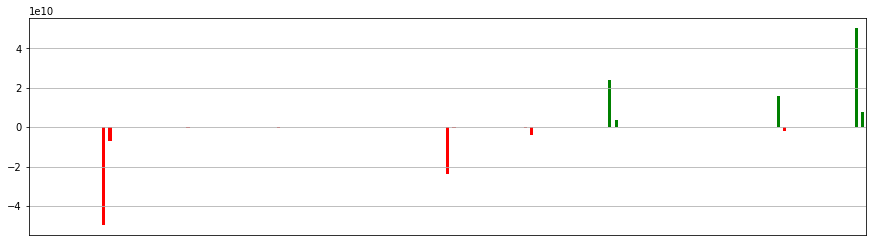

In [0]:
df_ps.dif.plot(kind='bar',
               color=df_ps.status.map({'Prejuízo': 'r', 'Excedente': 'g'}),
               figsize=(15, 4))
plt.xticks([])
plt.grid(axis='y')

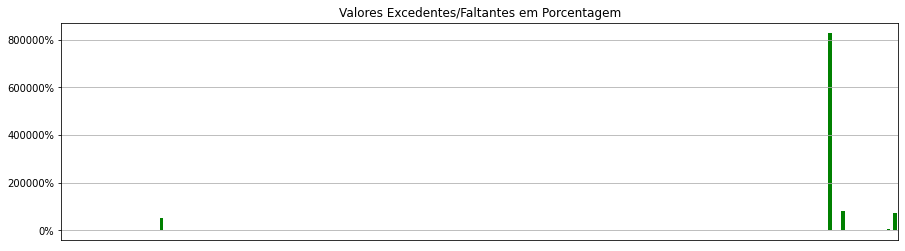

In [0]:
ax = df_ps.perc.plot(kind='bar',
                     color=df_ps.status.map({'Prejuízo': 'r', 'Excedente': 'g'}),
                     figsize=(15, 4),
                     title='Valores Excedentes/Faltantes em Porcentagem')
plt.grid(axis='y')
plt.xticks([])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [0]:
df_edu = dif_df.loc[dif_df["Área de atuação (Função)"]=="Educação"]

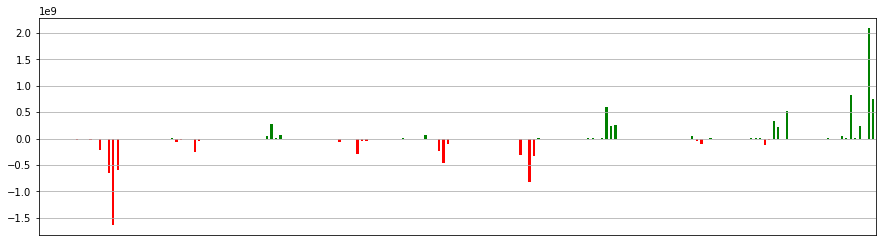

In [0]:
df_edu.dif.plot(kind='bar',color=df_edu.status.map({'Prejuízo': 'r', 'Excedente': 'g'}),figsize=(15, 4))
plt.xticks([])
plt.grid(axis='y')

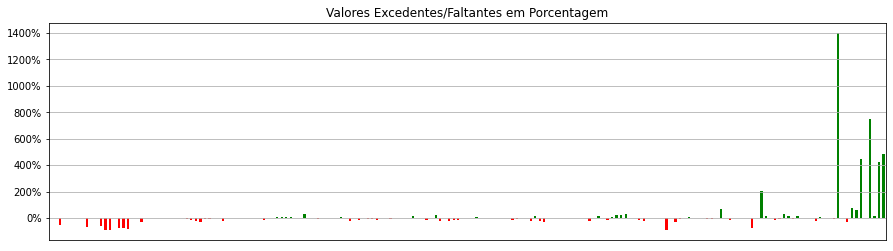

In [0]:
ax = df_edu.perc.plot(kind='bar',color=df_edu.status.map({'Prejuízo': 'r', 'Excedente': 'g'}),figsize=(15, 4),title='Valores Excedentes/Faltantes em Porcentagem')
plt.grid(axis='y')
plt.xticks([])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())